<h1>Content</h1>
<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#1">Load Libraries</a></li>
        <li><a href="#2">Load Dataset</a></li>
        <li><a href="#3">Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#4">Visualisation and White Noise Observing</a></li>
        <li><a href="#5">Resampling Dataset</a></li>        
        <li><a href="#6">Anomaly Detection Methods</a></li>
            <ol>
                <li><a href="#7">Seasonal-Trend Decomposition using LOESS (STL)</a></li>
                <li><a href="#8">DBSCAN</a></li>
                <li><a href="#9">Isolation Forests For Anomaly Detection</a></li>                
                <li><a href="#10">SVM-Based Anomaly Detection</a></li>
                <li><a href="#11">Gaussian Distribution</a></li>
                <li><a href="#12">Using an LSTM Autoencoder</a></li>
                <li><a href="#13">Anomaly Detection Using Prophet</a></li>
                <li><a href="#14">Library Of Arundo</a></li> 
                    <ol>
                        <li><a href="#15">ThresholdAD</a></li>
                        <li><a href="#16">InterQuartileRangeAD</a></li>
                        <li><a href="#17">PersistAD</a></li>
                        <li><a href="#18">AutoregressionAD</a></li>
                        <li><a href="#23">MinClusterDetector</a></li>
                    </ol>
            </ol>
    </ol>
</div>
<br>
<hr>

## DATA
* link: https://github.com/numenta/NAB 
* "data\realKnownCause\machine_temperature_system_failure.csv" 

<a id="1"></a>
## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import STL
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf
pd.options.mode.chained_assignment = None
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)
import warnings
warnings.filterwarnings("ignore")

Tensorflow version: 2.1.0


<a id="2"></a>
## Load Dataset

In [75]:
df = pd.read_csv(r"C:\Users\monster\Desktop\time_series\first\machine_temperature_system_failure.csv",
                     index_col="timestamp",parse_dates=True)

In [3]:
df.head()

value
timestamp                     
2013-12-02 21:15:00  73.967322
2013-12-02 21:20:00  74.935882
2013-12-02 21:25:00  76.124162
2013-12-02 21:30:00  78.140707
2013-12-02 21:35:00  79.329836

<a id="3"></a>
## Exploratory Data Analysis (EDA)

In [4]:
print("Number of rows and columns:", df.shape)
print("The time series starts from:", df.index.min())
print("The time series ends on:", df.index.max())

Number of rows and columns: (22695, 1)
The time series starts from: 2013-12-02 21:15:00
The time series ends on: 2014-02-19 15:25:00


In [5]:
# Total Day:
df.index.max() - df.index.min()

Timedelta('78 days 18:10:00')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22695 entries, 2013-12-02 21:15:00 to 2014-02-19 15:25:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   22695 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB


In [7]:
df.index

DatetimeIndex(['2013-12-02 21:15:00', '2013-12-02 21:20:00',
               '2013-12-02 21:25:00', '2013-12-02 21:30:00',
               '2013-12-02 21:35:00', '2013-12-02 21:40:00',
               '2013-12-02 21:45:00', '2013-12-02 21:50:00',
               '2013-12-02 21:55:00', '2013-12-02 22:00:00',
               ...
               '2014-02-19 14:40:00', '2014-02-19 14:45:00',
               '2014-02-19 14:50:00', '2014-02-19 14:55:00',
               '2014-02-19 15:00:00', '2014-02-19 15:05:00',
               '2014-02-19 15:10:00', '2014-02-19 15:15:00',
               '2014-02-19 15:20:00', '2014-02-19 15:25:00'],
              dtype='datetime64[ns]', name='timestamp', length=22695, freq=None)

In [8]:
df.describe()

value
count  22695.000000
mean      85.926498
std       13.746912
min        2.084721
25%       83.080078
50%       89.408246
75%       94.016252
max      108.510543

<a id="4"></a>
## Visualisation and White Noise Observing

## White Noise Time Series
* Why Does it Matter?
* White noise is an important concept in time series analysis and forecasting.

* It is important for two main reasons:

    * Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
    * Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise.

## White Noise
   * A white noise series is a time series that is purely random and has variables that are independent and identically distributed with a mean of zero. This means that the observations have the same variance and there is no auto-correlation. 
   * One of the initial techniques is to look at the summary statistics. This can be done with the code below. The output shows that the mean is not zero and the standard deviation is not one. These numbers indicate that the series is not white noise.

## Visualizing the series
* We can see that it does appear that the series is random.

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["value"], name='Value'))
fig.update_layout(showlegend=True, title='Dist of Value')
fig.show()

* We can also create a histogram to confirm whether the distribution is normal.
* If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

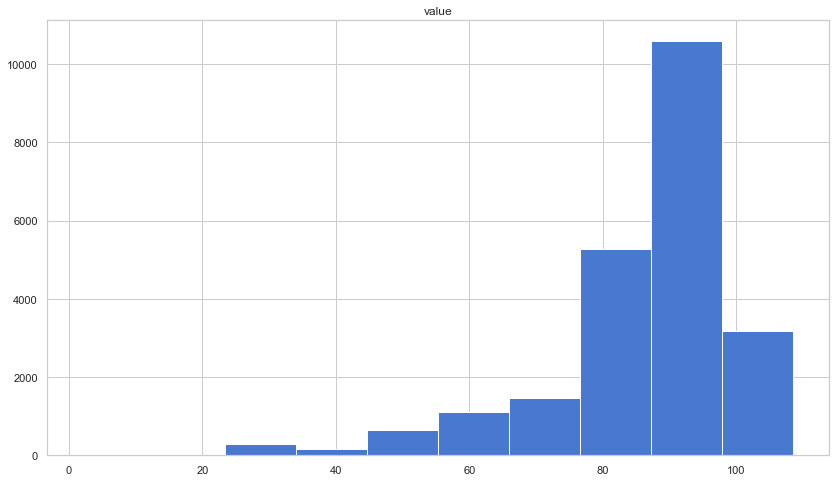

In [10]:
# histogram plot
df.hist()
plt.show()

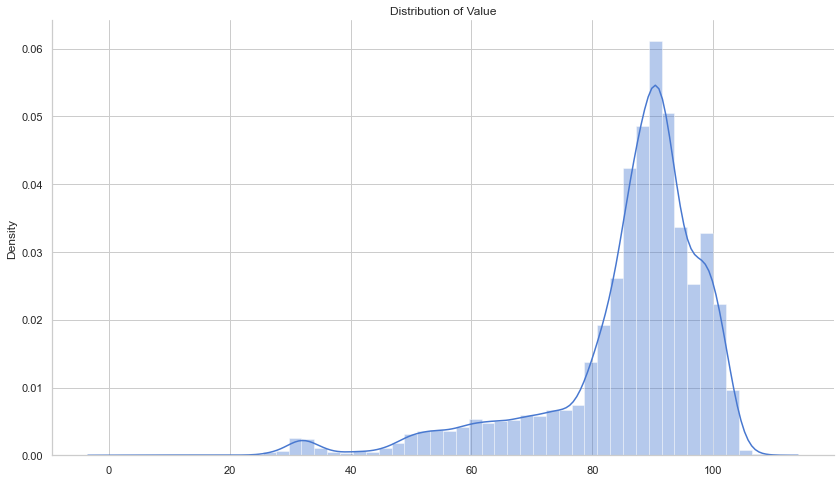

In [11]:
sns.distplot(df)
plt.title("Distribution of Value")
sns.despine()

* Another method of confirming this is through auto-correlation, which is expected to be zero. This can be visualized with the code below.
* The output shows a significant autocorrelation pattern. All of the above analysis suggests that this is not a white noise series.

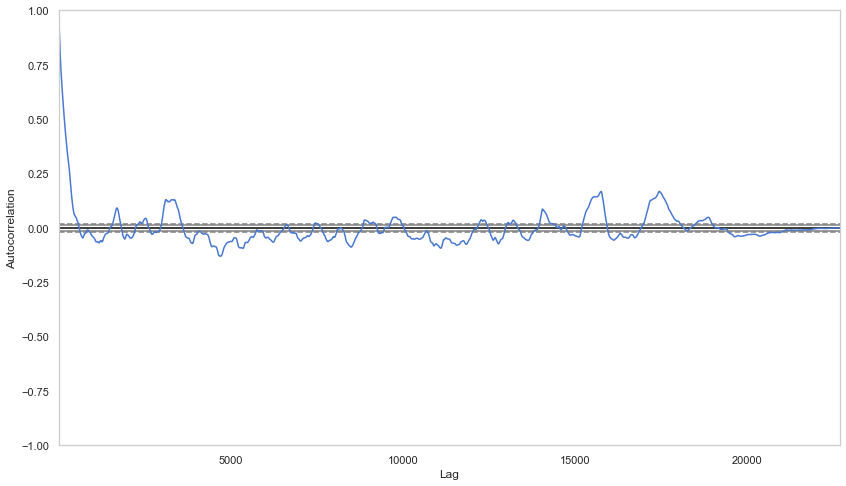

In [12]:
# autocorrelation
autocorrelation_plot(df)
plt.show()

<a id="5"></a>
## Resampling Dataset

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

* A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. 
* We have a value for every 5 mins 
    * 24 * 60 / 5 = 288 timesteps per day

In [13]:
# resample df hourly
hourly = df.resample(rule="H").mean()

In [14]:
hourly.head(20)

value
timestamp                     
2013-12-02 21:00:00  78.011596
2013-12-02 22:00:00  80.598012
2013-12-02 23:00:00  81.625018
2013-12-03 00:00:00  82.965454
2013-12-03 01:00:00  84.529097
2013-12-03 02:00:00  85.847283
2013-12-03 03:00:00  88.674810
2013-12-03 04:00:00  91.045415
2013-12-03 05:00:00  88.015681
2013-12-03 06:00:00  82.979071
2013-12-03 07:00:00  81.980995
2013-12-03 08:00:00  85.674440
2013-12-03 09:00:00  84.246588
2013-12-03 10:00:00  80.976662
2013-12-03 11:00:00  74.941190
2013-12-03 12:00:00  76.233071
2013-12-03 13:00:00  79.910021
2013-12-03 14:00:00  81.519299
2013-12-03 15:00:00  83.564364
2013-12-03 16:00:00  83.170316

In [15]:
hourly.shape

(1891, 1)

<a id="6"></a>
## Anomaly Detection Methods

<a id="7"></a>
## Seasonal-Trend Decomposition using LOESS (STL)

Text(0, 0.5, 'Value')

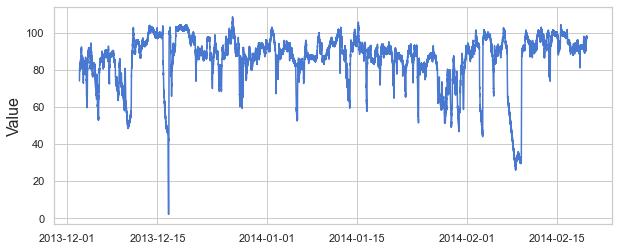

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.ylabel("Value", fontsize=16)

Perform STL Decomp

In [17]:
stl = STL(hourly)
result = stl.fit()

In [18]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

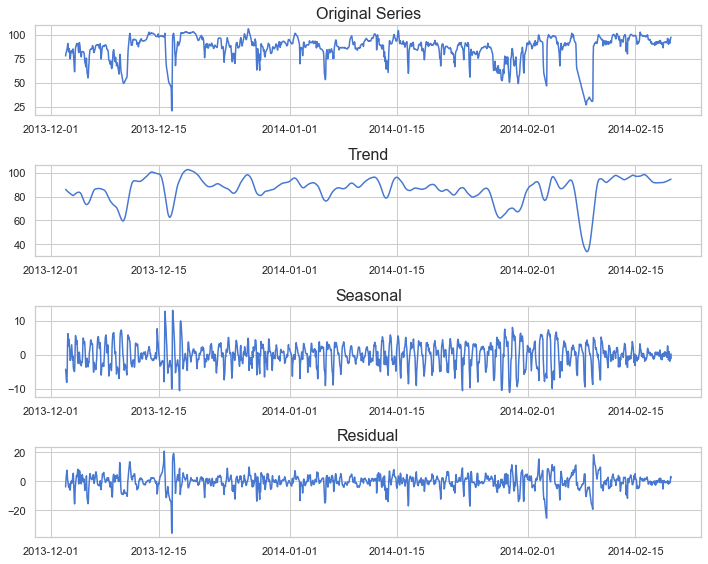

In [19]:
plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(hourly)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

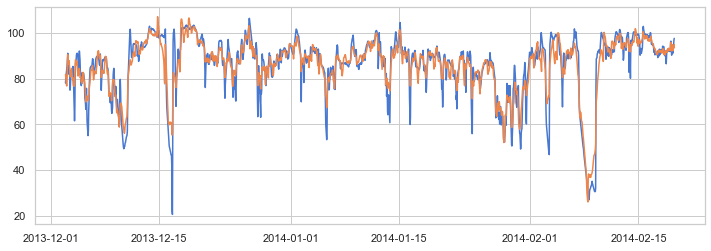

In [20]:
estimated = trend + seasonal # without residual
plt.figure(figsize=(12,4))
plt.plot(hourly)
plt.plot(estimated)

### Anomaly Detection

In [21]:
resid_mu = resid.mean()
resid_dev = resid.std()
# 3
lower_limit = resid_mu - 3*resid_dev
upper_limit = resid_mu + 3*resid_dev

(16041.0, 16120.0)

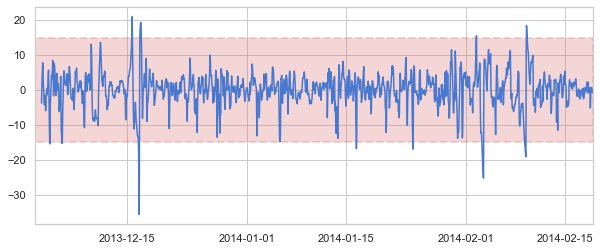

In [22]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2013,12,2), datetime(2014,2,19)], lower_limit, upper_limit, color='r', 
                 alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2013,12,2), datetime(2014,2,19))

In [23]:
anomalies = hourly[(resid < lower_limit) | (resid > upper_limit)]

In [24]:
anomalies

value
timestamp                      
2013-12-04 01:00:00   61.532599
2013-12-05 19:00:00   55.057879
2013-12-15 16:00:00   97.872144
2013-12-15 17:00:00   98.650070
2013-12-16 15:00:00   41.296139
2013-12-16 16:00:00   22.004861
2013-12-16 17:00:00   20.641281
2013-12-16 20:00:00  100.033923
2013-12-16 21:00:00  100.442232
2013-12-16 22:00:00  101.630998
2013-12-16 23:00:00  100.057397
2013-12-17 00:00:00   96.733374
2014-01-16 11:00:00   59.922313
2014-01-24 11:00:00   55.962724
2014-01-24 12:00:00   55.982114
2014-02-02 11:00:00   98.614549
2014-02-03 06:00:00   53.546679
2014-02-03 07:00:00   51.697354
2014-02-03 08:00:00   50.287348
2014-02-03 09:00:00   49.137508
2014-02-03 10:00:00   47.078185
2014-02-03 11:00:00   46.768150
2014-02-09 06:00:00   31.536234
2014-02-09 07:00:00   30.880488
2014-02-09 08:00:00   30.632596
2014-02-09 09:00:00   30.583324
2014-02-09 10:00:00   30.641056
2014-02-09 11:00:00   32.311358
2014-02-09 13:00:00   88.594669
2014-02-09 14:00:00   88.924268
2014-02-09 15:00:00   89.137559

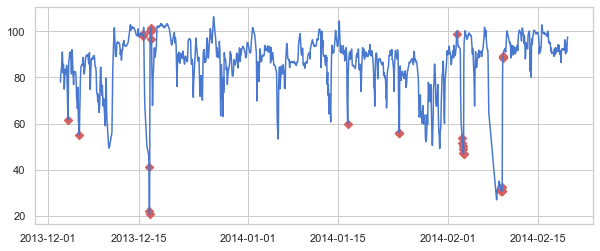

In [25]:
plt.figure(figsize=(10,4))
plt.plot(hourly)
plt.scatter(anomalies.index, anomalies["value"], color='r', marker='D')

<hr></hr>

<a id="8"></a>
## DBSCAN

In [26]:
# resample df hourly
hourly = df.resample(rule="H").mean()

In [27]:
scaler = StandardScaler()
hourly_scaled = scaler.fit_transform(hourly[["value"]])

In [28]:
model = DBSCAN(eps=0.25, min_samples=12, metric="euclidean")
model.fit(hourly_scaled)

DBSCAN(eps=0.25, min_samples=12)

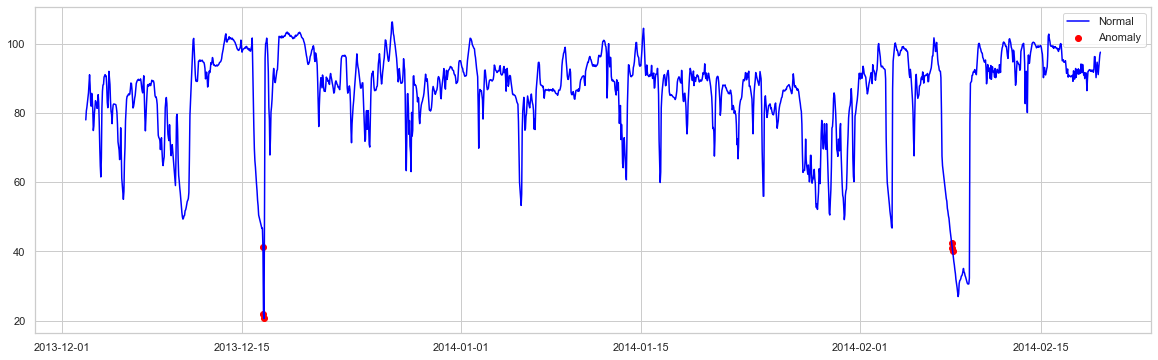

In [29]:
fig, ax = plt.subplots(figsize=(20,6))
anomalies = hourly[model.labels_ == -1]

ax.plot(hourly.index, hourly.value, color='blue', label = 'Normal')
ax.scatter(anomalies.index,anomalies.value, color='red', label = 'Anomaly')
plt.legend()
plt.show()

<a id="9"></a>
## Isolation Forests For Anomaly Detection
* Isolation Forest is a tree based, very effective algorithm for detecting anomalies. It builds multiple trees. To build a tree, it randomly picks a feature and a split value within the minimums and maximums values of the corresponding feature. This procedure is applied to all samples in the dataset. And finally, a tree ensemble is composed by averaging all trees in the forest.
* The idea behind the Isolation Forest is that outliers are easy to diverge from rest of the samples in dataset. For this reason, we expect shorter paths from root to a leaf node in a tree(the number of splittings required to isolate the sample) for abnormal samples compared to rest of the samples in dataset.

In [30]:
# resample df hourly
hourly = df.resample(rule="H").mean()

In [31]:
hourly.head()

value
timestamp                     
2013-12-02 21:00:00  78.011596
2013-12-02 22:00:00  80.598012
2013-12-02 23:00:00  81.625018
2013-12-03 00:00:00  82.965454
2013-12-03 01:00:00  84.529097

In [32]:
scaler = StandardScaler()
hourly_scaled = scaler.fit_transform(hourly[["value"]])

In [33]:
model = IsolationForest(contamination=0.01)
model.fit(hourly_scaled)

IsolationForest(contamination=0.01)

* returns 1 for normal, -1 for anomaly

In [34]:
hourly['anomaly_isolation'] = model.predict(hourly_scaled)

In [35]:
hourly.head()

value  anomaly_isolation
timestamp                                        
2013-12-02 21:00:00  78.011596                  1
2013-12-02 22:00:00  80.598012                  1
2013-12-02 23:00:00  81.625018                  1
2013-12-03 00:00:00  82.965454                  1
2013-12-03 01:00:00  84.529097                  1

In [36]:
hourly["anomaly_isolation"].value_counts()

 1    1872
-1      19
Name: anomaly_isolation, dtype: int64

In [37]:
hourly.loc[ hourly["anomaly_isolation"] == -1 ]

value  anomaly_isolation
timestamp                                        
2013-12-16 16:00:00  22.004861                 -1
2013-12-16 17:00:00  20.641281                 -1
2014-02-08 06:00:00  37.155092                 -1
2014-02-08 07:00:00  36.099969                 -1
2014-02-08 10:00:00  31.861333                 -1
2014-02-08 11:00:00  30.854021                 -1
2014-02-08 12:00:00  29.705266                 -1
2014-02-08 13:00:00  28.383913                 -1
2014-02-08 14:00:00  26.971556                 -1
2014-02-08 15:00:00  27.713841                 -1
2014-02-08 16:00:00  30.747107                 -1
2014-02-08 17:00:00  31.530577                 -1
2014-02-08 18:00:00  31.766454                 -1
2014-02-09 00:00:00  35.088183                 -1
2014-02-09 06:00:00  31.536234                 -1
2014-02-09 07:00:00  30.880488                 -1
2014-02-09 08:00:00  30.632596                 -1
2014-02-09 09:00:00  30.583324                 -1
2014-02-09 10:00:00  30.641056                 -1

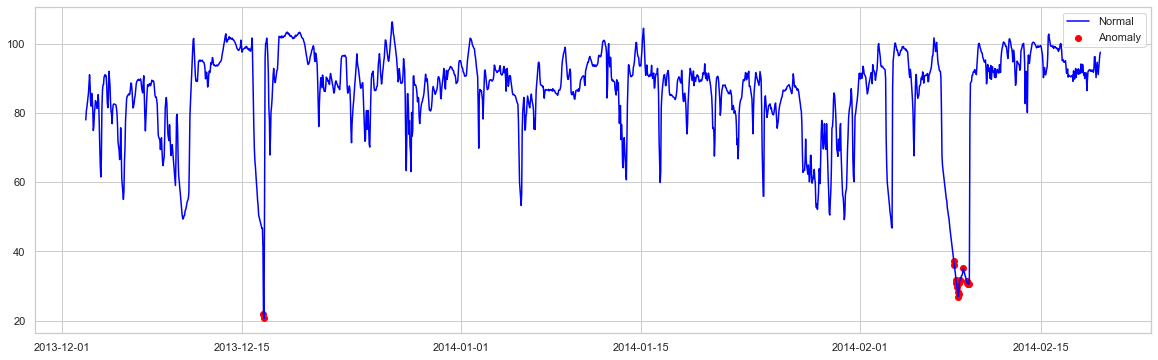

In [38]:
fig, ax = plt.subplots(figsize=(20,6))
anomalies = hourly.loc[hourly["anomaly_isolation"] == -1] 

ax.plot(hourly.index, hourly.value, color='blue', label = 'Normal')
ax.scatter(anomalies.index,anomalies.value, color='red', label = 'Anomaly')
plt.legend()

plt.show()

<a id="10"></a>
## SVM-Based Anomaly Detection
* OneClassSVM can be used to identify anomalies

In [39]:
# resample df hourly
hourly = df.resample(rule="H").mean()

In [40]:
scaler = StandardScaler()
hourly_scaled = scaler.fit_transform(hourly[["value"]])

In [41]:
model = OneClassSVM(nu=0.01,kernel="rbf", gamma=0.01)
model.fit(hourly_scaled)
hourly['anomaly_svm'] = model.predict(hourly_scaled)

In [42]:
hourly.head()

value  anomaly_svm
timestamp                                  
2013-12-02 21:00:00  78.011596            1
2013-12-02 22:00:00  80.598012            1
2013-12-02 23:00:00  81.625018            1
2013-12-03 00:00:00  82.965454            1
2013-12-03 01:00:00  84.529097            1

In [43]:
hourly.anomaly_svm.value_counts()

 1    1872
-1      19
Name: anomaly_svm, dtype: int64

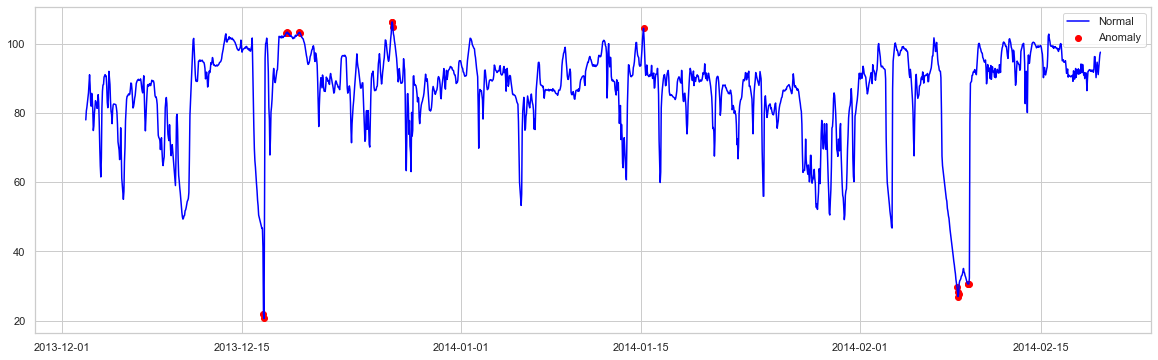

In [44]:
fig, ax = plt.subplots(figsize=(20,6))
anomalies = hourly.loc[hourly["anomaly_svm"] == -1] 

ax.plot(hourly.index, hourly.value, color='blue', label = 'Normal')
ax.scatter(anomalies.index,anomalies.value, color='red', label = 'Anomaly')
plt.legend()
plt.show()

<a id="11"></a>
## Gaussian Distribution
* Scikit-Learn’s covariance.EllipticEnvelope is a function that tries to figure out the key parameters of our data’s general distribution by assuming that our entire data is an expression of an underlying multivariate Gaussian distribution.
* And we will assume that our dataset is gaussian distribution.

In [45]:
# resample df hourly
hourly = df.resample(rule="H").mean()

In [46]:
envelope =  EllipticEnvelope(contamination = 0.01) 
X_train = hourly.values.reshape(-1,1)
envelope.fit(X_train)

hourly['anomaly_gaussian'] = envelope.predict(X_train)

In [47]:
hourly.head()

value  anomaly_gaussian
timestamp                                       
2013-12-02 21:00:00  78.011596                 1
2013-12-02 22:00:00  80.598012                 1
2013-12-02 23:00:00  81.625018                 1
2013-12-03 00:00:00  82.965454                 1
2013-12-03 01:00:00  84.529097                 1

In [48]:
hourly.anomaly_gaussian.value_counts()

 1    1872
-1      19
Name: anomaly_gaussian, dtype: int64

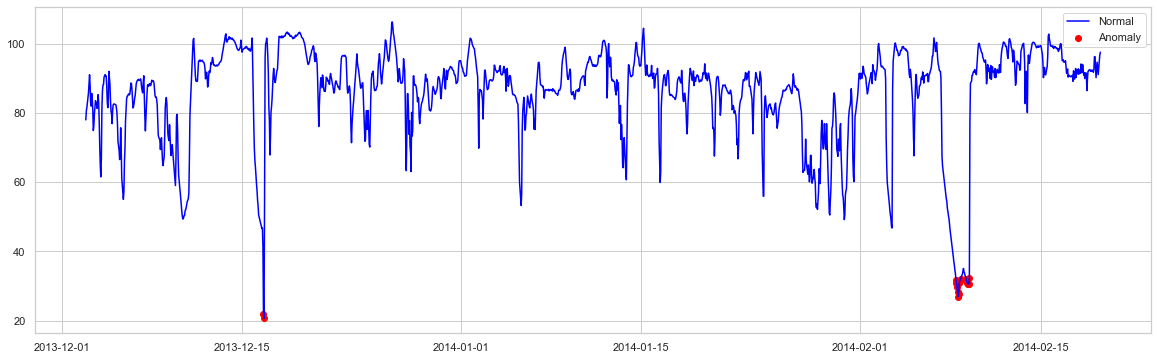

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))
anomalies = hourly.loc[hourly["anomaly_gaussian"] == -1] 

ax.plot(hourly.index, hourly.value, color='blue', label = 'Normal')
ax.scatter(anomalies.index,anomalies.value, color='red', label = 'Anomaly')
plt.legend()
plt.show()

<a id="12"></a>
## Using an LSTM Autoencoder

* Prepare training data

In [50]:
# resample df hourly
hourly = df.resample(rule="H").mean()

In [51]:
hourly.shape

(1891, 1)

* Data Preprocessing
* We’ll use 80% of the data and train our model on it:

In [52]:
train_size = int(len(hourly) * 0.8)
test_size = len(hourly) - train_size
train, test = hourly.iloc[0:train_size], hourly.iloc[train_size:len(hourly)]
print(train.shape, test.shape)

(1512, 1) (379, 1)


* Next, we’ll rescale the data using the training data and apply the same transformation to the test data:

In [53]:
scaler = StandardScaler()
hourly_scaled = scaler.fit(train[["value"]])

train['value'] = scaler.transform(train[['value']])
test['value']  = scaler.transform(test[['value']])

* Finally, we’ll split the data into subsequences. Here’s the little helper function for that:

In [54]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

* We’ll create sequences with 1 hour worth of historical data:

In [55]:
time_steps = 1

X_train, y_train = create_dataset(train[['value']], train.value, time_steps)
X_test, y_test = create_dataset(test[['value']], test.value, time_steps)

print(X_train.shape)

(1511, 1, 1)


* Build an LSTM Autoencoder
* Our Autoencoder should take a sequence as input and outputs a sequence of the same shape.

* The RepeatVector layer simply repeats the input n times. Adding return_sequences=True in LSTM layer makes it return the sequence.
* the TimeDistributed layer creates a vector with a length of the number of outputs from the previous layer. Our first LSTM Autoencoder is ready for training.

In [56]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]
model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))                 
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 1)              129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

* Train the Autoencoder
* It is a regular LSTM model

In [57]:
# patience : If our network doesn’t improve for 3 consecutive epochs,
# i.e. validation loss is not decreased we are going to stop our training process.
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks = [es],
    shuffle=False
)

Train on 1359 samples, validate on 152 samples
Epoch 1/100
1359/1359 [==============================] - 3s 3ms/sample - loss: 0.5734 - val_loss: 0.6585
Epoch 2/100
1359/1359 [==============================] - 0s 125us/sample - loss: 0.2344 - val_loss: 0.2567
Epoch 3/100
1359/1359 [==============================] - 0s 114us/sample - loss: 0.1723 - val_loss: 0.2506
Epoch 4/100
1359/1359 [==============================] - 0s 128us/sample - loss: 0.1747 - val_loss: 0.2493
Epoch 5/100
1359/1359 [==============================] - 0s 139us/sample - loss: 0.1784 - val_loss: 0.2472
Epoch 6/100
1359/1359 [==============================] - 0s 132us/sample - loss: 0.1763 - val_loss: 0.2500
Epoch 7/100
1359/1359 [==============================] - ETA: 0s - loss: 0.173 - 0s 128us/sample - loss: 0.1692 - val_loss: 0.2489
Epoch 8/100
1359/1359 [==============================] - 0s 144us/sample - loss: 0.1756 - val_loss: 0.2470
Epoch 9/100
1359/1359 [==============================] - 0s 140us/sample - 

 * Plot Metrics and Evaluate the Model

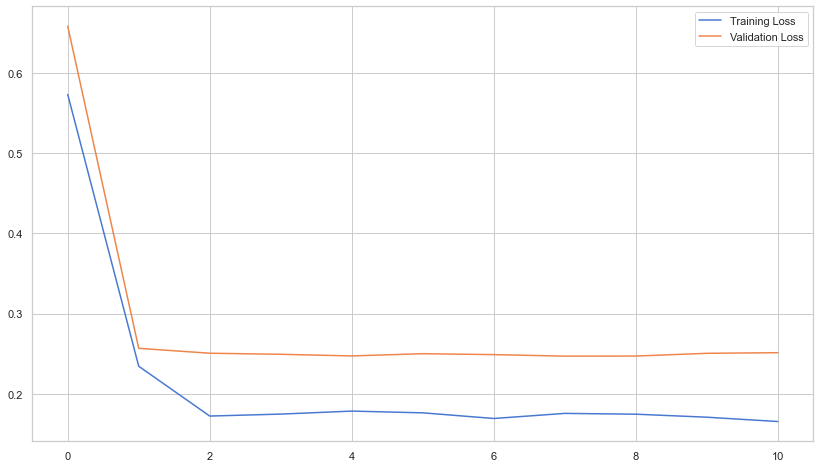

In [58]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

* Finding Anomalies
* Still, we need to detect anomalies. Let’s start with calculating the Mean Absolute Error (MAE) on the training data:

In [59]:
X_train_pred = model.predict(X_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

In [60]:
model.evaluate(X_test, y_test)

378/378 [==============================] - 0s 50us/sample - loss: 0.1871


0.1871074887889403

* Let’s have a look at the error:

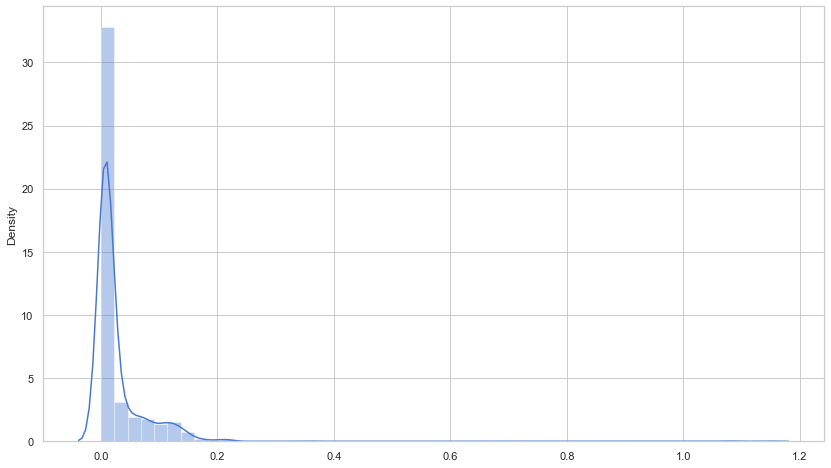

In [61]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [62]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

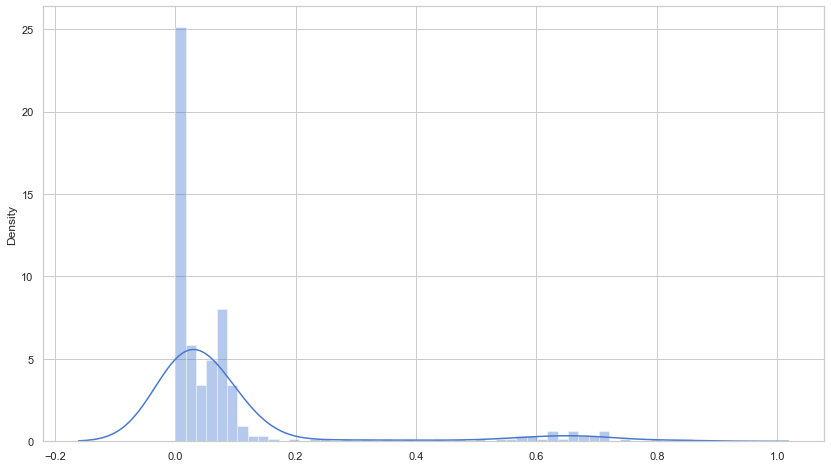

In [63]:
sns.distplot(test_mae_loss, bins=50, kde=True);

* We’ll pick a threshold of 0.65, as not much of the loss is larger than that. When the error is larger than that, we’ll declare that example an anomaly:

In [64]:
THRESHOLD = 0.65

test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['value'] = test[time_steps:].value

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[time_steps:].index, y=test_score_df.loss,
                    mode='lines',
                    name='Test Loss'))
fig.add_trace(go.Scatter(x=test[time_steps:].index, y=test_score_df.threshold,
                    mode='lines',
                    name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [66]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

value      loss  threshold  anomaly
timestamp                                                  
2014-02-08 11:00:00 -4.644608  0.662787       0.65     True
2014-02-08 12:00:00 -4.741868  0.701254       0.65     True
2014-02-08 13:00:00 -4.853740  0.746286       0.65     True
2014-02-08 14:00:00 -4.973318  0.799592       0.65     True
2014-02-08 15:00:00 -4.910472  0.858305       0.65     True

In [67]:
anomalies.shape

(16, 4)

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[time_steps:].index, y=scaler.inverse_transform(test[time_steps:].value),
                    mode='lines',
                    name='Test Loss'))
fig.add_trace(go.Scatter(x=anomalies.index, y=scaler.inverse_transform(anomalies.value),
                    mode='markers',
                    name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

<a id="13"></a>
## Anomaly Detection Using Prophet

In [139]:
from fbprophet import Prophet

In [140]:
# resample df hourly
hourly = df.resample(rule="H").mean()
hourly.head()

value
timestamp                     
2013-12-02 21:00:00  78.011596
2013-12-02 22:00:00  80.598012
2013-12-02 23:00:00  81.625018
2013-12-03 00:00:00  82.965454
2013-12-03 01:00:00  84.529097

In [141]:
prophet_df = hourly.reset_index().rename(columns={'timestamp':'ds', 'value':'y'})
prophet_df.head()

ds          y
0 2013-12-02 21:00:00  78.011596
1 2013-12-02 22:00:00  80.598012
2 2013-12-02 23:00:00  81.625018
3 2013-12-03 00:00:00  82.965454
4 2013-12-03 01:00:00  84.529097

In [142]:
train_size = int(len(prophet_df) * 0.90)
test_size = len(prophet_df) - train_size
train, test = prophet_df.iloc[0:train_size], prophet_df.iloc[train_size:len(prophet_df)]
print(train.shape, test.shape)

(1701, 2) (190, 2)


In [143]:
# changepoint_range : güven aralığı
m = Prophet(changepoint_range=0.95)
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [144]:
# Forcasting into the future: test size=190
future = m.make_future_dataframe(periods=190, freq="H")
future.tail() 

ds
1886 2014-02-19 11:00:00
1887 2014-02-19 12:00:00
1888 2014-02-19 13:00:00
1889 2014-02-19 14:00:00
1890 2014-02-19 15:00:00

In [145]:
# make predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1886 2014-02-19 11:00:00  74.121587   58.518389   91.583393
1887 2014-02-19 12:00:00  74.200140   57.877572   90.295007
1888 2014-02-19 13:00:00  74.646245   58.459999   91.900252
1889 2014-02-19 14:00:00  75.103822   59.355311   91.910615
1890 2014-02-19 15:00:00  75.334937   59.563650   93.516058

In [146]:
forecast.shape

(1891, 19)

In [147]:
prophet_df.shape

(1891, 2)

In [158]:
# we will compare real and predict values
results = pd.concat([prophet_df.set_index("ds")["y"], forecast.set_index("ds")[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)

In [159]:
results.head()

y       yhat  yhat_lower  yhat_upper
ds                                                               
2013-12-02 21:00:00  78.011596  76.623159   59.782180   93.548306
2013-12-02 22:00:00  80.598012  76.980208   60.714553   94.072020
2013-12-02 23:00:00  81.625018  77.127810   60.344318   92.938417
2013-12-03 00:00:00  82.965454  77.229093   61.526836   93.805250
2013-12-03 01:00:00  84.529097  77.332457   60.600860   93.888374

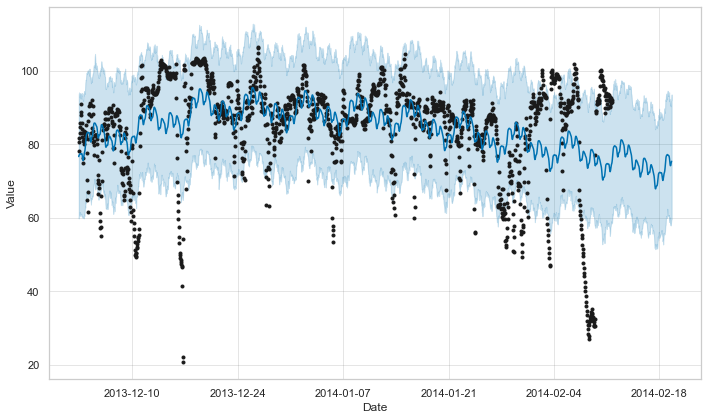

In [150]:
# You can plot the forecast
figure1 = m.plot(forecast, xlabel='Date', ylabel='Value')

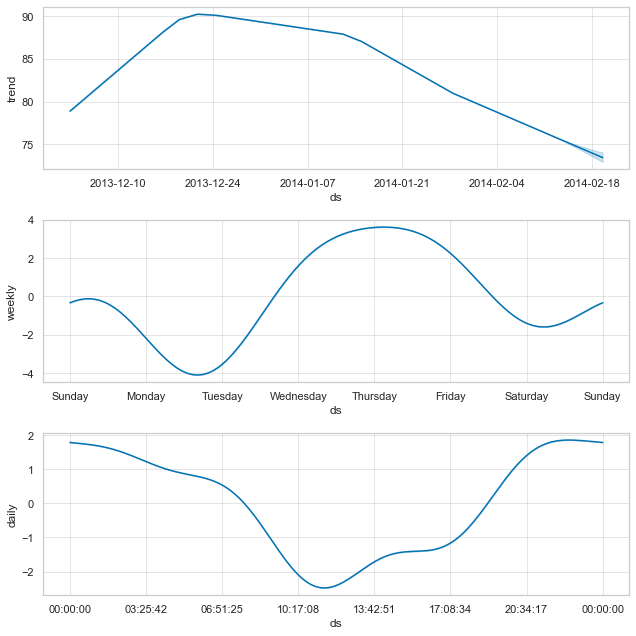

In [151]:
# If you want to see the forecast components
comp = m.plot_components(forecast)

* Adding new features for detection

In [160]:
results["error"] = results["y"] - results["yhat"]

In [161]:
results["uncertainty"] = results["yhat_upper"] - results["yhat_lower"]

In [162]:
results.head()

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2013-12-02 21:00:00  78.011596  76.623159   59.782180   93.548306  1.388437   
2013-12-02 22:00:00  80.598012  76.980208   60.714553   94.072020  3.617804   
2013-12-02 23:00:00  81.625018  77.127810   60.344318   92.938417  4.497209   
2013-12-03 00:00:00  82.965454  77.229093   61.526836   93.805250  5.736361   
2013-12-03 01:00:00  84.529097  77.332457   60.600860   93.888374  7.196641   

                     uncertainty  
ds                                
2013-12-02 21:00:00    33.766126  
2013-12-02 22:00:00    33.357467  
2013-12-02 23:00:00    32.594099  
2013-12-03 00:00:00    32.278414  
2013-12-03 01:00:00    33.287515

In [165]:
# possible being outliers
results[results["error"].abs() > results["uncertainty"]]

y       yhat  yhat_lower  yhat_upper      error  \
ds                                                                             
2013-12-16 07:00:00  50.516802  85.048719   69.024436  102.029811 -34.531917   
2013-12-16 08:00:00  49.876145  84.345618   67.027309   99.931383 -34.469472   
2013-12-16 09:00:00  49.136886  83.353718   66.435280   99.492793 -34.216833   
2013-12-16 11:00:00  47.842345  81.767286   64.448515   97.391425 -33.924941   
2013-12-16 12:00:00  47.447437  81.723667   65.081020   98.894103 -34.276230   
2013-12-16 13:00:00  46.648173  82.071283   65.763791   97.905111 -35.423110   
2013-12-16 14:00:00  46.734618  82.454385   66.158667   99.650982 -35.719767   
2013-12-16 15:00:00  41.296139  82.635230   66.947040   98.636388 -41.339091   
2013-12-16 16:00:00  22.004861  82.685328   65.578177   97.836746 -60.680467   
2013-12-16 17:00:00  20.641281  82.893250   64.856300   99.140756 -62.251968   
2014-01-30 18:00:00  49.193949  82.521196   66.476018   98.694360 -33.327248   
2014-01-30 19:00:00  50.565528  83.251490   66.733501   99.068038 -32.685962   
2014-02-08 02:00:00  42.390317  77.451744   60.011718   94.855269 -35.061427   
2014-02-08 03:00:00  41.009979  77.163433   59.795787   93.616023 -36.153454   
2014-02-08 04:00:00  40.183183  76.863564   60.605582   93.389118 -36.680381   
2014-02-08 05:00:00  38.557390  76.649129   59.245605   93.018363 -38.091739   
2014-02-08 06:00:00  37.155092  76.496216   59.787398   92.402715 -39.341124   
2014-02-08 07:00:00  36.099969  76.223240   60.075757   93.423401 -40.123271   
2014-02-08 08:00:00  34.692096  75.642185   59.837095   92.116906 -40.950090   
2014-02-08 09:00:00  33.584924  74.773868   58.156186   90.775247 -41.188944   
2014-02-08 10:00:00  31.861333  73.909182   57.156363   90.618068 -42.047849   
2014-02-08 11:00:00  30.854021  73.423802   57.616947   89.832538 -42.569781   
2014-02-08 12:00:00  29.705266  73.488989   58.308492   88.753326 -43.783723   
2014-02-08 13:00:00  28.383913  73.936550   58.888507   90.022194 -45.552637   
2014-02-08 14:00:00  26.971556  74.408837   57.755170   91.163752 -47.437281   
2014-02-08 15:00:00  27.713841  74.666271   57.811559   90.164444 -46.952429   
2014-02-08 16:00:00  30.747107  74.778614   58.789106   91.429023 -44.031507   
2014-02-08 17:00:00  31.530577  75.032787   58.565688   91.683484 -43.502211   
2014-02-08 18:00:00  31.766454  75.649997   60.035183   93.090709 -43.883543   
2014-02-08 19:00:00  32.102772  76.573371   60.317668   92.374372 -44.470599   
2014-02-08 20:00:00  32.880638  77.509911   61.376301   95.115084 -44.629273   
2014-02-08 21:00:00  33.001181  78.169224   62.840515   95.304140 -45.168043   
2014-02-08 22:00:00  33.455492  78.469805   60.985678   95.047026 -45.014313   
2014-02-08 23:00:00  34.279178  78.537915   62.233516   95.586933 -44.258737   
2014-02-09 00:00:00  35.088183  78.536093   61.962793   95.032384 -43.447910   
2014-02-09 01:00:00  34.127449  78.512330   62.768746   94.793717 -44.384881   
2014-02-09 02:00:00  33.797831  78.411455   62.074470   93.900060 -44.613624   
2014-02-09 03:00:00  33.026853  78.203226   62.627528   93.767686 -45.176373   
2014-02-09 04:00:00  32.623573  77.958611   60.429579   94.293914 -45.335037   
2014-02-09 05:00:00  32.026979  77.773905   61.880753   94.041107 -45.746926   
2014-02-09 06:00:00  31.536234  77.624763   61.242902   93.972409 -46.088529   
2014-02-09 07:00:00  30.880488  77.329429   60.968603   95.092161 -46.448941   
2014-02-09 08:00:00  30.632596  76.699992   59.707929   93.119564 -46.067396   
2014-02-09 09:00:00  30.583324  75.757646   58.155538   90.476120 -45.174322   
2014-02-09 10:00:00  30.641056  74.793938   57.772845   91.568858 -44.152882   
2014-02-09 11:00:00  32.311358  74.185463   57.814637   90.615775 -41.874105   

                     uncertainty  
ds                                
2013-12-16 07:00:00    33.005375  
2013-12-16 08:00:00    32.904073  
2013-12-16 09:00:00    33.057513  
2013-12-16 11

In [166]:
results["anomaly"] = results.apply(lambda x: "Yes" if np.abs(x["error"]) > x["uncertainty"] else "No", axis=1)

In [167]:
results.head()

y       yhat  yhat_lower  yhat_upper     error  \
ds                                                                            
2013-12-02 21:00:00  78.011596  76.623159   59.782180   93.548306  1.388437   
2013-12-02 22:00:00  80.598012  76.980208   60.714553   94.072020  3.617804   
2013-12-02 23:00:00  81.625018  77.127810   60.344318   92.938417  4.497209   
2013-12-03 00:00:00  82.965454  77.229093   61.526836   93.805250  5.736361   
2013-12-03 01:00:00  84.529097  77.332457   60.600860   93.888374  7.196641   

                     uncertainty anomaly  
ds                                        
2013-12-02 21:00:00    33.766126      No  
2013-12-02 22:00:00    33.357467      No  
2013-12-02 23:00:00    32.594099      No  
2013-12-03 00:00:00    32.278414      No  
2013-12-03 01:00:00    33.287515      No

In [171]:
fig = px.scatter(results.reset_index(), x="ds", y="y", color="anomaly",title="Show The Anomalies")
fig.show()

<a id="14"></a>
## Library Of Arundo
* https://www.arundo.com/arundo_tech_blog/adtk-open-source-time-series-anomaly-detection-in-python
* https://arundo-adtk.readthedocs-hosted.com/en/latest/examples.html

In [172]:
# resample df hourly
hourly = df.resample(rule="H").mean()
hourly.head()

value
timestamp                     
2013-12-02 21:00:00  78.011596
2013-12-02 22:00:00  80.598012
2013-12-02 23:00:00  81.625018
2013-12-03 00:00:00  82.965454
2013-12-03 01:00:00  84.529097

In [182]:
hourly.describe()

value
count  1891.000000
mean     85.924294
std      13.678702
min      20.641281
25%      82.850726
50%      89.475313
75%      93.883631
max     106.303664

## Observing Some Models

<a id="15"></a>
## ThresholdAD
* Compares each time series value with given thresholds.

In [174]:
from adtk.data import validate_series
s = validate_series(hourly)

In [185]:
from adtk.detector import ThresholdAD
high = 85.92 + 13.67
low = 85.92 - 13.67
threshold_ad = ThresholdAD(high=high, low=low)
anomalies = threshold_ad.detect(s)

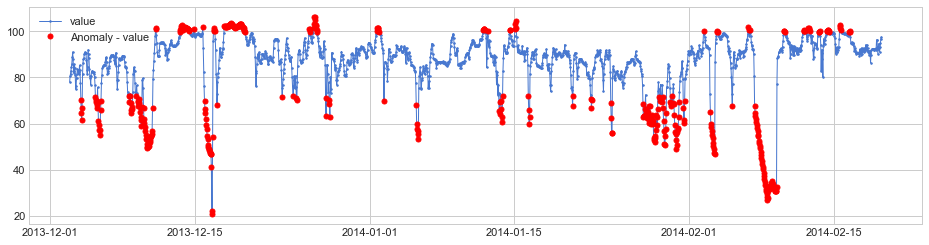

In [186]:
from adtk.visualization import plot
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

<a id="16"></a>
## InterQuartileRangeAD
* InterQuartileRangeAD is another widely used detector based on simple historical statistics is based on interquartile range (IQR). When a value is out of the range defined by [Q1−c×IQR, Q3+c×IQR] where IQR=Q3−Q1 is the difference between 25% and 75% quantiles. This detector is usually preferred to QuantileAD in the case where only a tiny portion or even none of training data is anomalous.

In [187]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s)

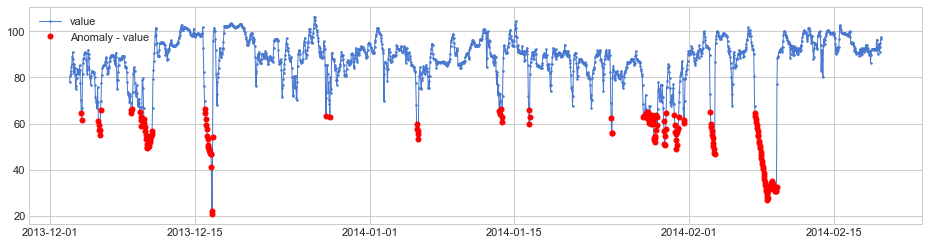

In [188]:
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

<a id="17"></a>
## PersistAD 
* PersistAD compares each time series value with its previous values.

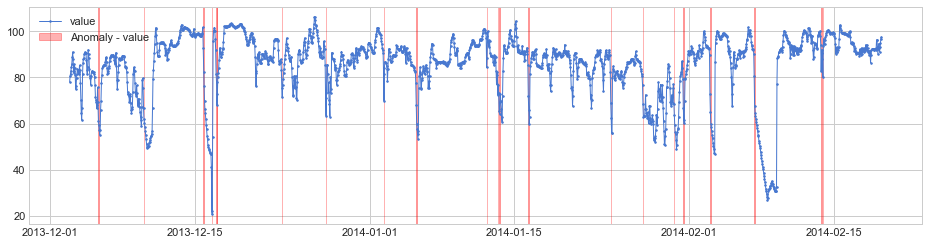

In [189]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0, side='negative')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

<a id="18"></a>
## AutoregressionAD
* AutoregressionAD detects anomalous changes of autoregressive behavior in time series.

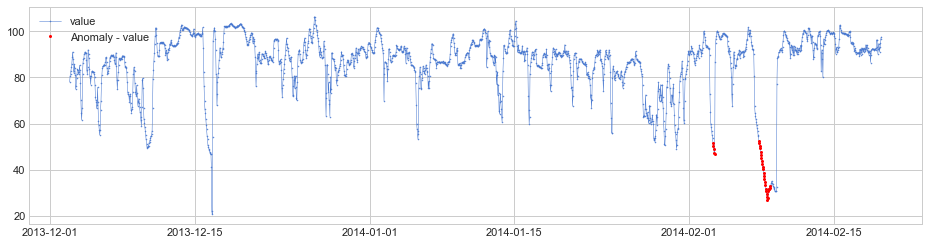

In [191]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)
anomalies = autoregression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

<a id="19"></a>
## MinClusterDetector
* MinClusterDetector treats multivariate time series as independent points in a high-dimensional space, divides them into clusters, and identifies values in the smallest cluster as anomalous. This may help capturing outliers in high-dimensional space.

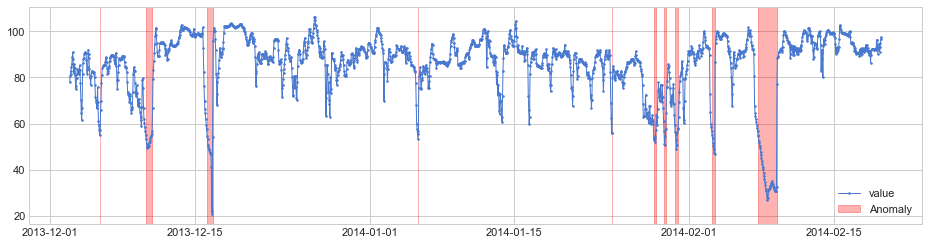

In [198]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=4))
anomalies = min_cluster_detector.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');